# Part I - (Prosper Loan Data)
## by (Ismail Omodara)

## Introduction
This document explores a dataset containing loans and attributes for approximately 114,000 loan listing, with about 81 unique variables (such as loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others) to give more information about each data entry (loan). Furthermore, for the purpose of our exploration and explanation, we would focus on paying attention to just 15 out of the 81 variables.

<span id="dataset-variables"></span>
Variables we would be exploring
    <ol>
        <li>**Term** - The length of the loan expressed in months.</li>
        <li>**LoanStatus** - The current status of the loan.</li>
        <li>**BorrowerAPR** - The Borrower's Annual Percentage Rate (APR) for the loan.</li>
        <li>**BorrowerRate** - The Borrower's interest rate for this loan. </li>
    <li>**ProsperScore** - A custom risk score built using historical Prosper data.</li>
        <li>**Occupation** - The Occupation selected by the Borrower at the time they created the listing.</li>
        <li>**EmploymentStatus** - The employment status of the borrower at the time they posted the listing.</li>
    <li>**EmploymentStatusDuration** - The length in months of the employment status at the time the listing was created.</li>
    <li>**OpenRevolvingMonthlyPayment** - Monthly payment on revolving accounts at the time the credit profile was pulled.</li>
        <li>**StatedMonthlyIncome** - The monthly income the borrower stated at the time the listing was created.</li>
    <li>**ScorexChangeAtTimeOfListing** - Borrower's credit score change at the time the credit profile was pulled. This will be the change relative to the borrower's last Prosper loan. This value will be null if the borrower had no prior loans.</li>
        <li>**LoanOriginalAmount** - The origination amount of the loan.</li>
        <li>**MonthlyLoanPayment** - The scheduled monthly loan payment.</li>
    <li>**Investors** - The number of investers that funded the loan.</li>
    </ol>




In [364]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [365]:
# Load in the dataset into a pandas dataframe
loans_all = pd.read_csv('prosperLoanData.csv')

In [366]:
print(loans_all.shape)
loans_all.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [367]:
# Since we would be dealing with specific variables, we can to create a copy of the original
# dataset so we can see all columns at once

variables = ["Term", "LoanStatus", "BorrowerAPR", "BorrowerRate", "ProsperScore", "Occupation", "EmploymentStatus", 
             "EmploymentStatusDuration", "OpenRevolvingMonthlyPayment", "StatedMonthlyIncome", 
             "ScorexChangeAtTimeOfListing", "LoanOriginalAmount", "MonthlyLoanPayment", 
             "Investors"]

loans = loans_all[variables].copy()

In [368]:
print(loans.shape)
loans.head()

(113937, 14)


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,Occupation,EmploymentStatus,EmploymentStatusDuration,OpenRevolvingMonthlyPayment,StatedMonthlyIncome,ScorexChangeAtTimeOfListing,LoanOriginalAmount,MonthlyLoanPayment,Investors
0,36,Completed,0.16516,0.1580,NaN,Other,Self-employed,2.0,24.0,3083.333333,NaN,9425,330.43,258
1,36,Current,0.12016,0.0920,7.0,Professional,Employed,44.0,389.0,6125.000000,NaN,10000,318.93,1
2,36,Completed,0.28269,0.2750,NaN,Other,Not available,NaN,0.0,2083.333333,NaN,3001,123.32,41
3,36,Current,0.12528,0.0974,9.0,Skilled Labor,Employed,113.0,115.0,2875.000000,NaN,10000,321.45,158
4,36,Current,0.24614,0.2085,4.0,Executive,Employed,44.0,220.0,9583.333333,NaN,15000,563.97,20


In [369]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Term                         113937 non-null  int64  
 1   LoanStatus                   113937 non-null  object 
 2   BorrowerAPR                  113912 non-null  float64
 3   BorrowerRate                 113937 non-null  float64
 4   ProsperScore                 84853 non-null   float64
 5   Occupation                   110349 non-null  object 
 6   EmploymentStatus             111682 non-null  object 
 7   EmploymentStatusDuration     106312 non-null  float64
 8   OpenRevolvingMonthlyPayment  113937 non-null  float64
 9   StatedMonthlyIncome          113937 non-null  float64
 10  ScorexChangeAtTimeOfListing  18928 non-null   float64
 11  LoanOriginalAmount           113937 non-null  int64  
 12  MonthlyLoanPayment           113937 non-null  float64
 13 

In [370]:
loans.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperScore,EmploymentStatusDuration,OpenRevolvingMonthlyPayment,StatedMonthlyIncome,ScorexChangeAtTimeOfListing,LoanOriginalAmount,MonthlyLoanPayment,Investors
count,113937.000000,113912.000000,113937.000000,84853.000000,106312.000000,113937.000000,1.139370e+05,18928.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,5.950067,96.071582,398.292161,5.608026e+03,-3.223214,8337.01385,272.475783,80.475228
std,10.436212,0.080364,0.074818,2.376501,94.480605,447.159711,7.478497e+03,50.063567,6245.80058,192.697812,103.239020
min,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,0.000000e+00,-209.000000,1000.00000,0.000000,1.000000
25%,36.000000,0.156290,0.134000,4.000000,26.000000,114.000000,3.200333e+03,-35.000000,4000.00000,131.620000,2.000000
50%,36.000000,0.209760,0.184000,6.000000,67.000000,271.000000,4.666667e+03,-3.000000,6500.00000,217.740000,44.000000
75%,36.000000,0.283810,0.250000,8.000000,137.000000,525.000000,6.825000e+03,25.000000,12000.00000,371.580000,115.000000
max,60.000000,0.512290,0.497500,11.000000,755.000000,14985.000000,1.750003e+06,286.000000,35000.00000,2251.510000,1189.000000


### Observation

#### Quality Issue
- Missing value for some entries:
    - BorrowerAPR, 
    - Occupation, 
    - EmploymentStatus, 
    - EmploymentStatusDuration

#### Tidiness Issues
- `ProsperScore` - The missing values for entry before July 2009. Also maximum value should be 10.
- `ScorexChangeAtTimeOfListing` - The missing values for listings where borrower has no prior loans.


### Cleaning Dataset

In [371]:
# Make a copy of dataset

loans_clean = loans.copy()

In [372]:
# Remove all entries with empty BorrowerAPR, Occupation, EmploymentStatus, EmploymentStatusDuration values

print('Before removal - {}'.format(loans_clean.shape))

loans_clean = loans_clean[loans_clean['BorrowerAPR'].notna()]
loans_clean = loans_clean[loans_clean['Occupation'].notna()]
loans_clean = loans_clean[loans_clean['EmploymentStatus'].notna()]
loans_clean = loans_clean[loans_clean['EmploymentStatusDuration'].notna()]

print('After removal - {}'.format(loans_clean.shape))

Before removal - (113937, 14)
After removal - (104985, 14)


In [373]:
# Checking for the LoanStatus of entries with ProsperScore as null

print('Empty Prosper Scores - ', loans_clean.ProsperScore.isnull().sum())
loans_clean[loans_clean.ProsperScore.isnull()]['LoanStatus'].value_counts()

Empty Prosper Scores -  21478


Completed     13891
Chargedoff     5300
Defaulted      2286
Cancelled         1
Name: LoanStatus, dtype: int64

In [374]:
# Calculating the mean of ProsperScore for Completed, Chargedoff, Defualted

print('Completed Mean - ', loans_clean.query('LoanStatus == "Completed"')['ProsperScore'].mean())
print('ChargedOff Mean - ', loans_clean.query('LoanStatus == "Chargedoff"')['ProsperScore'].mean())
print('Defaulted Mean - ', loans_clean.query('LoanStatus == "Defaulted"')['ProsperScore'].mean())

Completed Mean -  6.5379250661779675
ChargedOff Mean -  5.390701162354706
Defaulted Mean -  5.619900497512438


In [375]:
# We have created a function to help assign a value to all the entires with NaN ProsperScore
'''
    Completed - Borrower completed loan repayment on time, hence a high score (low risk) value is assigned.
    Chargedoff - Borrower completed loan repayment before time, hence a higher score (lower risk) value is assigned.
    Defaulted - Borrower did not complete loan repayment, hence lower score (high risk)
    Cancelled - A lower score than Defaulted
'''
def set_prosper_score(entry):
    
    score = entry.ProsperScore
    status = entry.LoanStatus
    
    if (score > 0):
        return score
    else:
        if (status == 'Completed'):
            return 7.0
        elif (status == 'Chargedoff'):
            return 5.0
        elif (status == 'Defaulted'):
            return 5.0
        else:
            return 1.0

In [376]:
loans_clean.ProsperScore.isnull().sum()

21478

In [377]:
# Fill up the null ProsperScore in the dataset

loans_clean['ProsperScore'] = loans_clean.apply(set_prosper_score, axis=1)

In [378]:
# Retain all entries where ProsperScore <= 10

loans_clean = loans_clean[loans_clean['ProsperScore'] <= 10.0]

In [379]:
loans_clean.ProsperScore.isnull().sum()

0

In [380]:
# Fill up the null ScorexChangeAtTimeOfListing in the dataset

loans_clean['ScorexChangeAtTimeOfListing'].fillna(0.0, inplace=True)

In [381]:
# Reviewing the result of the cleaning exercise

loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103549 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Term                         103549 non-null  int64  
 1   LoanStatus                   103549 non-null  object 
 2   BorrowerAPR                  103549 non-null  float64
 3   BorrowerRate                 103549 non-null  float64
 4   ProsperScore                 103549 non-null  float64
 5   Occupation                   103549 non-null  object 
 6   EmploymentStatus             103549 non-null  object 
 7   EmploymentStatusDuration     103549 non-null  float64
 8   OpenRevolvingMonthlyPayment  103549 non-null  float64
 9   StatedMonthlyIncome          103549 non-null  float64
 10  ScorexChangeAtTimeOfListing  103549 non-null  float64
 11  LoanOriginalAmount           103549 non-null  int64  
 12  MonthlyLoanPayment           103549 non-null  float64
 13 

In [382]:
loans_clean.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperScore,EmploymentStatusDuration,OpenRevolvingMonthlyPayment,StatedMonthlyIncome,ScorexChangeAtTimeOfListing,LoanOriginalAmount,MonthlyLoanPayment,Investors
count,103549.000000,103549.000000,103549.000000,103549.000000,103549.000000,103549.000000,1.035490e+05,103549.000000,103549.000000,103549.000000,103549.000000
mean,41.160455,0.221811,0.194511,5.963177,96.029348,411.280167,5.651124e+03,-0.590860,8488.543559,277.274319,81.954736
std,10.732090,0.080528,0.074882,2.100726,93.688300,447.686468,7.665947e+03,21.429045,6202.044115,190.989543,104.580139
min,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,0.000000e+00,-209.000000,1000.000000,0.000000,1.000000
25%,36.000000,0.158330,0.135500,4.000000,26.000000,127.000000,3.333333e+03,0.000000,4000.000000,137.980000,1.000000
50%,36.000000,0.212780,0.184500,6.000000,67.000000,285.000000,4.750000e+03,0.000000,7000.000000,227.210000,45.000000
75%,36.000000,0.287260,0.254900,7.000000,137.000000,540.000000,6.833333e+03,0.000000,12000.000000,375.720000,118.000000
max,60.000000,0.423950,0.360000,10.000000,755.000000,14985.000000,1.750003e+06,286.000000,35000.000000,2251.510000,1189.000000


#### Finalised Dataset

After our cleaning exercise, we can see our resulting dataset `loans_clean`.

### What is the structure of your dataset?

There are 113,937 entries in the dataset with 14 variables (as listed <a href="#dataset-variables">here</a>). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.

LoanStatus - [Cancelled, Chargedoff, Completed, Current, Defaulted,  FinalPaymentInProgress, PastDue] <br>
ProsperScore - The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009. <br>
  
### What is/are the main feature(s) of interest in your dataset?

We are most interested in figuring out what factors can be used to predict the status of loan's outcome.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

We would expect that MonthlyLoanPayment with Term would have an impact on the eventual loan's status. We also think that StatedMonthlyIncome would have an impact, as well as the borrower's employment status.

## Univariate Exploration

> Using visualisation to explore some of our variables of interest.


In [388]:
# Setting a default color to be used in our visualisation
color = sb.color_palette()[0]

#### What is the loan term borrowers seem to be most comfortbale with?

In [439]:
'''
    This function helps to plot a simple bar chart with
    the provided information.
    axis - Which axis to plot the categorical variable
    varialbe - Which variable to plot
    xlabel - The label for the x-axis
    ylabel - The label for the y-axis
'''
def plot_bar(axis, variable, title, xlabel, ylabel):
    if (axis == 'x'):
        sb.countplot(data = loans_clean, x = variable, color = color);
    else:
        sb.countplot(data = loans_clean, y = variable, color = color);
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

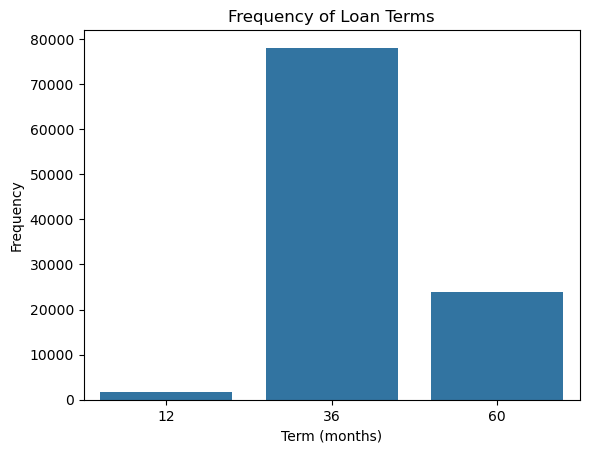

In [440]:
plot_bar("x", "Term", "Frequency of Loan Terms", "Term (months)", "Frequency")

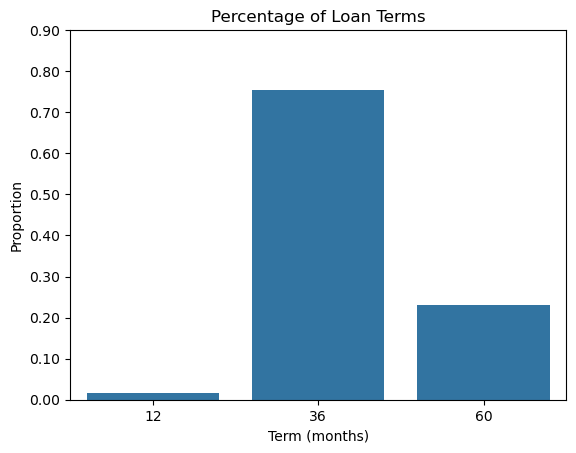

In [442]:
# Displaying the visualization as proportion.

plot_bar("x", "Term", "Percentage of Loan Terms", "Term (months)", "Proportion")

tick_props = np.arange(0, 1, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.yticks(tick_props * loans_clean.shape[0], tick_names);

We can see that close to 80% of the listings were scheduled for a duration of 36 months (3 years) for payback. It seems like most borrowers are convenient with this period as it creates better timeline and payback schedule for them to ensure they do not default or past due date.

#### How often do borrowers complete their request loans?

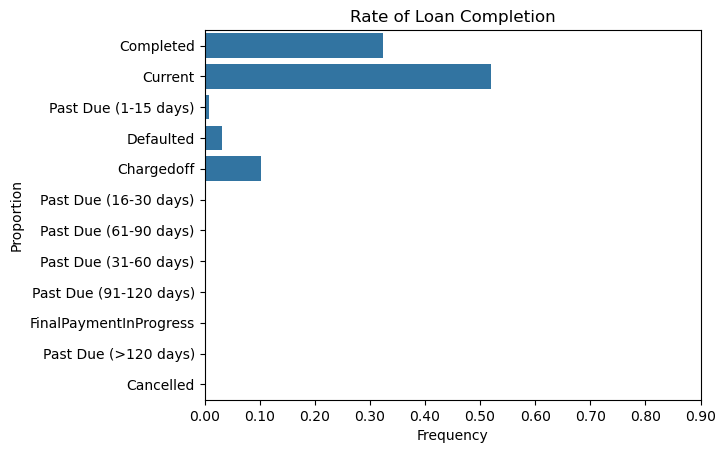

In [433]:
plot_bar("y", "LoanStatus", "Rate of Loan Completion", "Frequency", "Proportion")

tick_props = np.arange(0, 1, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.xticks(tick_props * loans_clean.shape[0], tick_names);

Approximately 40% of the loans have been completed (Completed or Chargedoff), which indicates there's a high completion rate. Borrowers tend to complete their loans, which means we would be able to get facters that contribute to this behaviour

### What is distribution on requested loan amounts?

In [443]:
def plot_hist(variable, binsize, title, xlabel, ylabel):
    bins = np.arange(0, loans_cut[variable].max()+binsize, binsize)
    
    plt.hist(data = loans_cut, x = variable, bins = bins)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

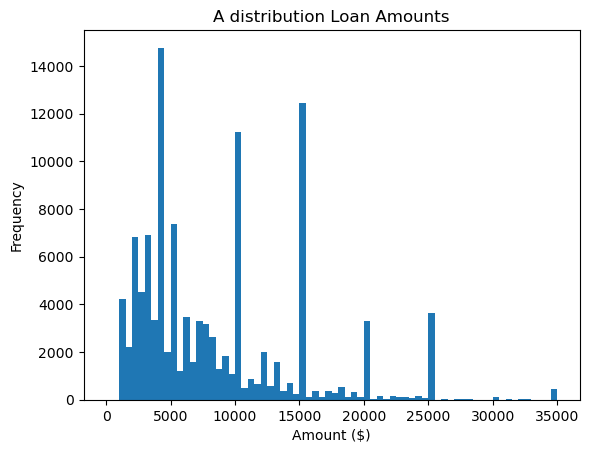

In [444]:
plot_hist("LoanOriginalAmount", 500, "A distribution Loan Amounts", "Amount ($)", "Frequency")

A lot of borrowers tend to always borrow amount that are multiple of 5. This could be an indication of people always not wanting to get the exact amount they need, but rather close it up to a round figure.

#### Do most borrowers have a guaranteed of paying back?

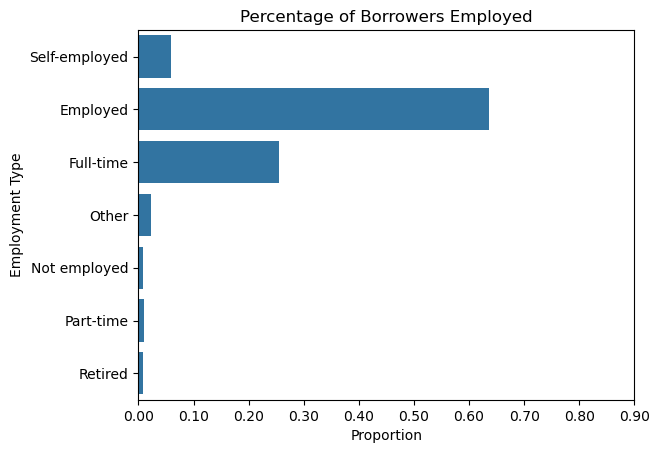

In [445]:
plot_bar("y", "EmploymentStatus", "Percentage of Borrowers Employed", "Proportion", "Employment Type")


tick_props = np.arange(0, 1, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.xticks(tick_props * loans_clean.shape[0], tick_names);

We can see that a very high percentage of borrowers have a job, with close to 70% being employed with active income and a quarter of that, a full-time job.

#### Would the interest rate attached to the loan have an effect of the ability for a borrower to pay back?

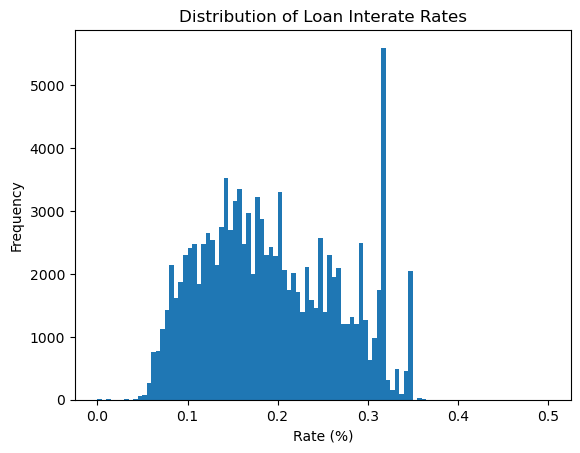

In [450]:
plot_hist("BorrowerRate", 0.005, "Distribution of Loan Interate Rates", "Rate (%)", "Frequency")

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Loan Amount showed a peak in amounts that are divisible by 5. And we said this could be an indication of people always not wanting to get the exact amount they need, but rather close it up to a round figure. No transformation was done.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, the ProsperScore variable had null value for some entries (about 29,000). Based on the explanation of what the ProsperScore is (A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score), I was able to fill up the null values based on the mean of LoanStatus for entries with valid ProsperScores.
> Also for the ScorexChangeAtTimeOfListing variable, I was able to fill the null values with 0, which is more appropriate, since it is only null when the borrower has no previous loans.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

